# CARICHE VARIABILI

Misuriamo l'angolo di torsione dovuto alla repulsione delle sfere cariche poste a una distanza fissa (10cm).
Nel primo file sono raccolte torsioni per sfere di uguale carica, nel secondo viene fissata la carica di una sfera e variata la seconda.
siccome considero sull'asse delle x il prodotto tra le cariche concateno le misure.

In [1]:
import numpy as np
import pandas as pd
import os
from interpolazione3 import b_std

dir_path = os.path.abspath('')
FILE_V1_COST_A2 = dir_path + '/../CSV/' + "d_cost_v1_cost_A2.csv"
FILE_V_EQ_A1 = dir_path + '/../CSV/' + "d_cost_v1_eq_v2_A1.csv"

fr1 = pd.read_csv(FILE_V_EQ_A1)
fr2 = pd.read_csv(FILE_V1_COST_A2)

V_fissa = np.array(fr1["V"]) *1000 # V  entrambe le sfere hanno la stessa carica
teta1 = np.array(fr1["teta1"]) #deg
teta2 = np.array(fr1["teta2"])
teta3 = np.array(fr1["teta3"])
v_fissa = V_fissa * V_fissa  # considero il prodotto delle cariche
teta_fissa = np.array([np.round(np.average([teta1[i], teta2[i], teta3[i]]), 0) for i in range(0, len(teta1))], dtype=np.float64)
sigma_teta_fissa = np.array([np.sqrt(b_std([teta1[i], teta2[i], teta3[i]])**2+1**2) for i in range(0, len(teta1))], dtype=np.float64)
teta_fissa = teta_fissa * np.pi / 180 #rad
sigma_teta_fissa = sigma_teta_fissa * np.pi / 180 #rad

v_variabile = np.array(fr2["V2"]) * 1000 # V
teta1 = np.array(fr2["teta1"])
teta2 = np.array(fr2["teta2"])
teta3 = np.array(fr2["teta3"])
v_variabile = v_variabile * 6000  # la seconda carica aveva valore fisso 6kV
teta_variabile = np.array([np.round(np.average([teta1[i], teta2[i], teta3[i]]), 0) for i in range(0, len(teta1))], dtype=np.float64)
sigma_teta_variabile = np.array([np.sqrt(b_std([teta1[i], teta2[i], teta3[i]])**2+1**2) for i in range(0, len(teta1))], dtype=np.float64)
teta_variabile = teta_variabile * np.pi / 180 # rad
sigma_teta_variabile = sigma_teta_variabile * np.pi / 180 # rad

raggio = 0.017
correzione = 1 - ((4 * np.power(raggio, 3)) / 0.1 ** 3)
teta_fissa = teta_fissa / correzione
teta_variabile = teta_variabile / correzione

VV = np.concatenate([v_variabile, v_fissa]) # prodotto delle cariche x
tetas = np.concatenate([teta_variabile, teta_fissa]) # angoli in rad y
sigma_tetas = np.concatenate([sigma_teta_variabile,sigma_teta_fissa]) #sigma_y

### verifica $\theta \propto V_1V_2$

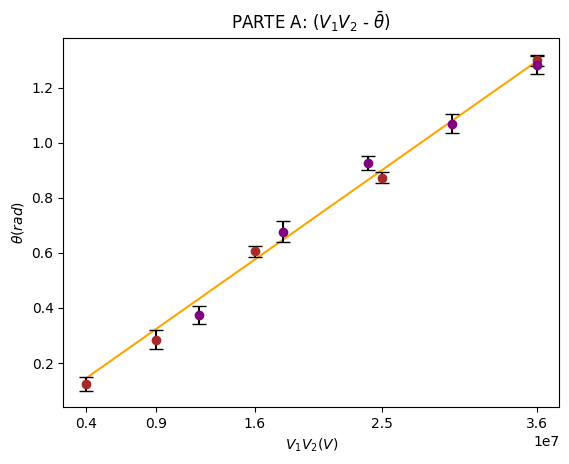


linearità BX
    
B: 3.598408064946805e-08
sigmaB 4.895069850371449e-10

sigmaY: [0.03186521 0.03902675 0.02468268 0.03490659 0.03186521 0.02468268
 0.03490659 0.02015333 0.02015333 0.02015333]
chiquadro ridotto: 1.82
df: 9
pvalue: 99.4%


In [2]:
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolataB

r = RettaInterpolataB(VV,tetas,sigma_tetas)

plt.title("PARTE A: ($V_1V_2$ - $\\bar{\\theta}$)")
plt.plot(r.x_best,r.y_best,color='orange')
plt.errorbar(v_fissa,teta_fissa,yerr=sigma_teta_fissa,color='brown',fmt='o',ecolor='black',capsize=5)
plt.errorbar(v_variabile,teta_variabile,yerr=sigma_teta_variabile,color='purple',fmt='o',ecolor='black',capsize=5)
plt.xticks(v_fissa)
plt.xlabel('$V_1V_2 (V)$')
plt.ylabel(f'${chr(92)}theta (rad)$')
plt.show()
print(r)